# Mixed Layer Processes 

### The term "mixed" refers to a given physical parameter of the ocean state (e.g. temperature, density...) that is assumed to be mixed and homogeneous to a certain level (e.g. regarding some space/time scales), from the surface down to the considered MLD.

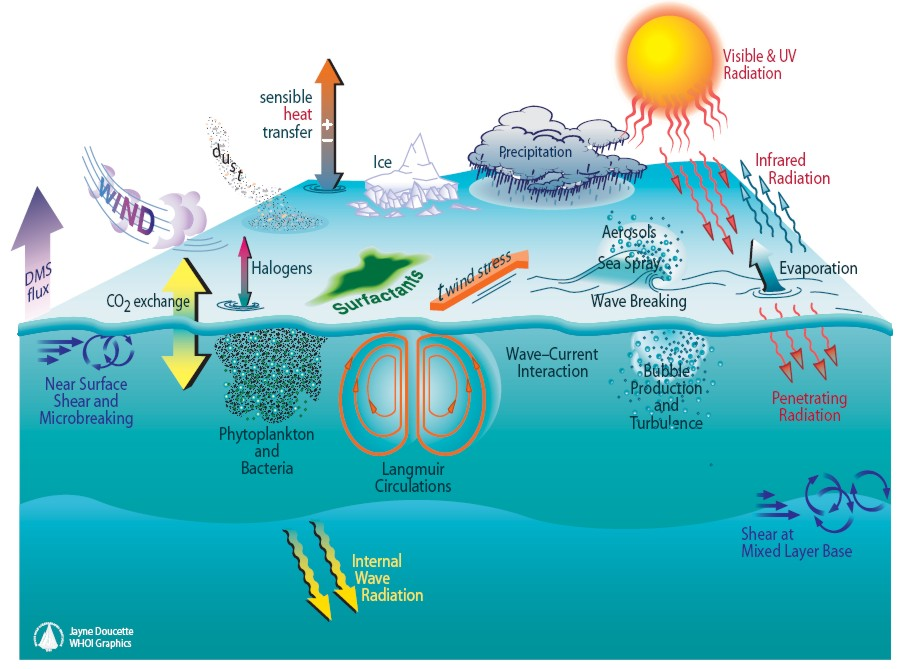

Schematic of processes operating at the air-sea interface and in the upper ocean mixed layer. 
(Illustration from Jayne Doucette, Woods Hole Oceanographic Institution)

## Profiles of temperature and salinity
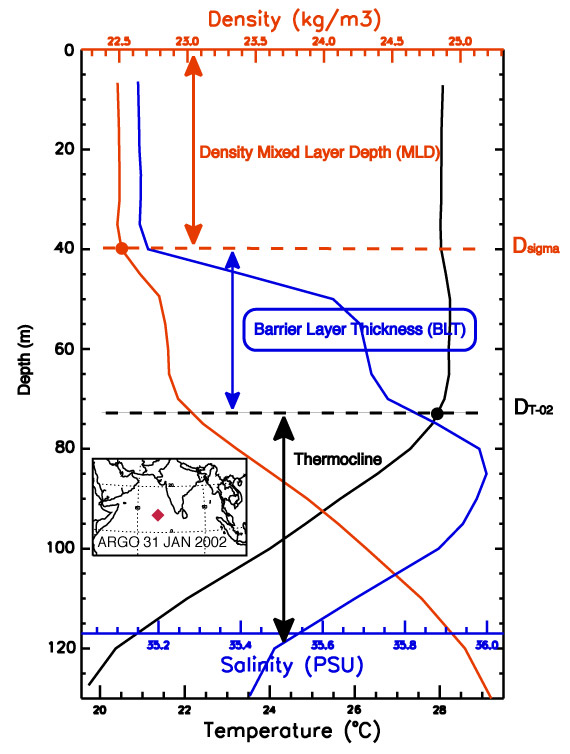

## How to calculate MLD
<div>
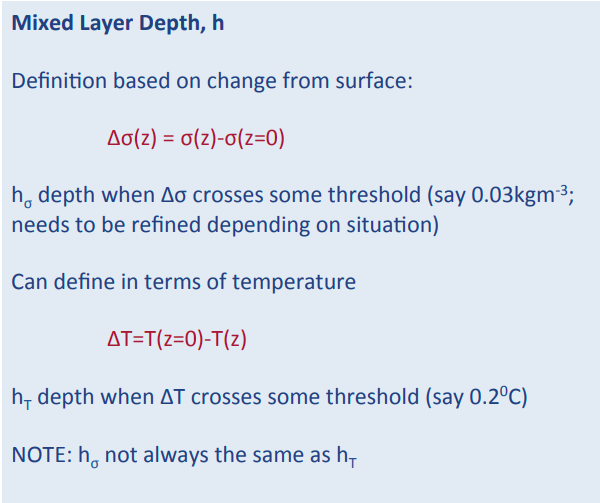
</div>

## Mixed layer depth is so complicated !! 
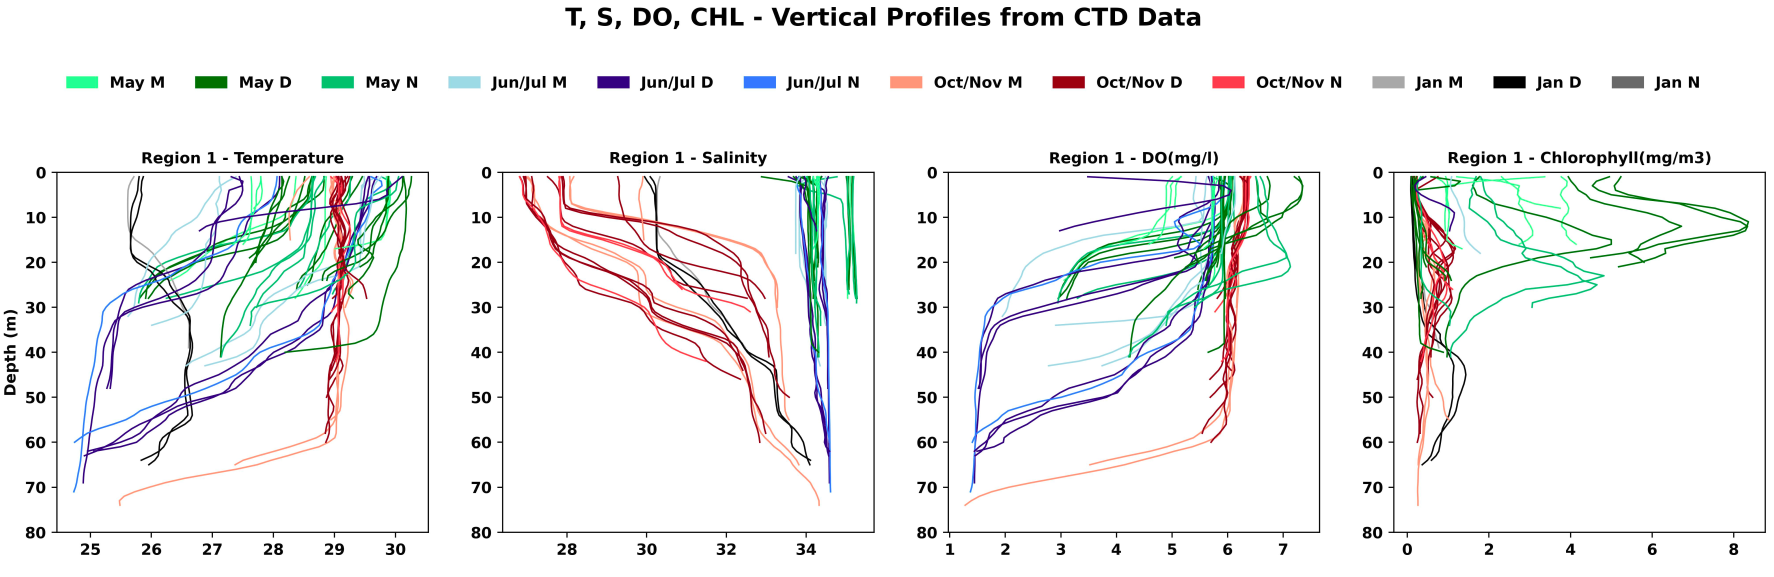

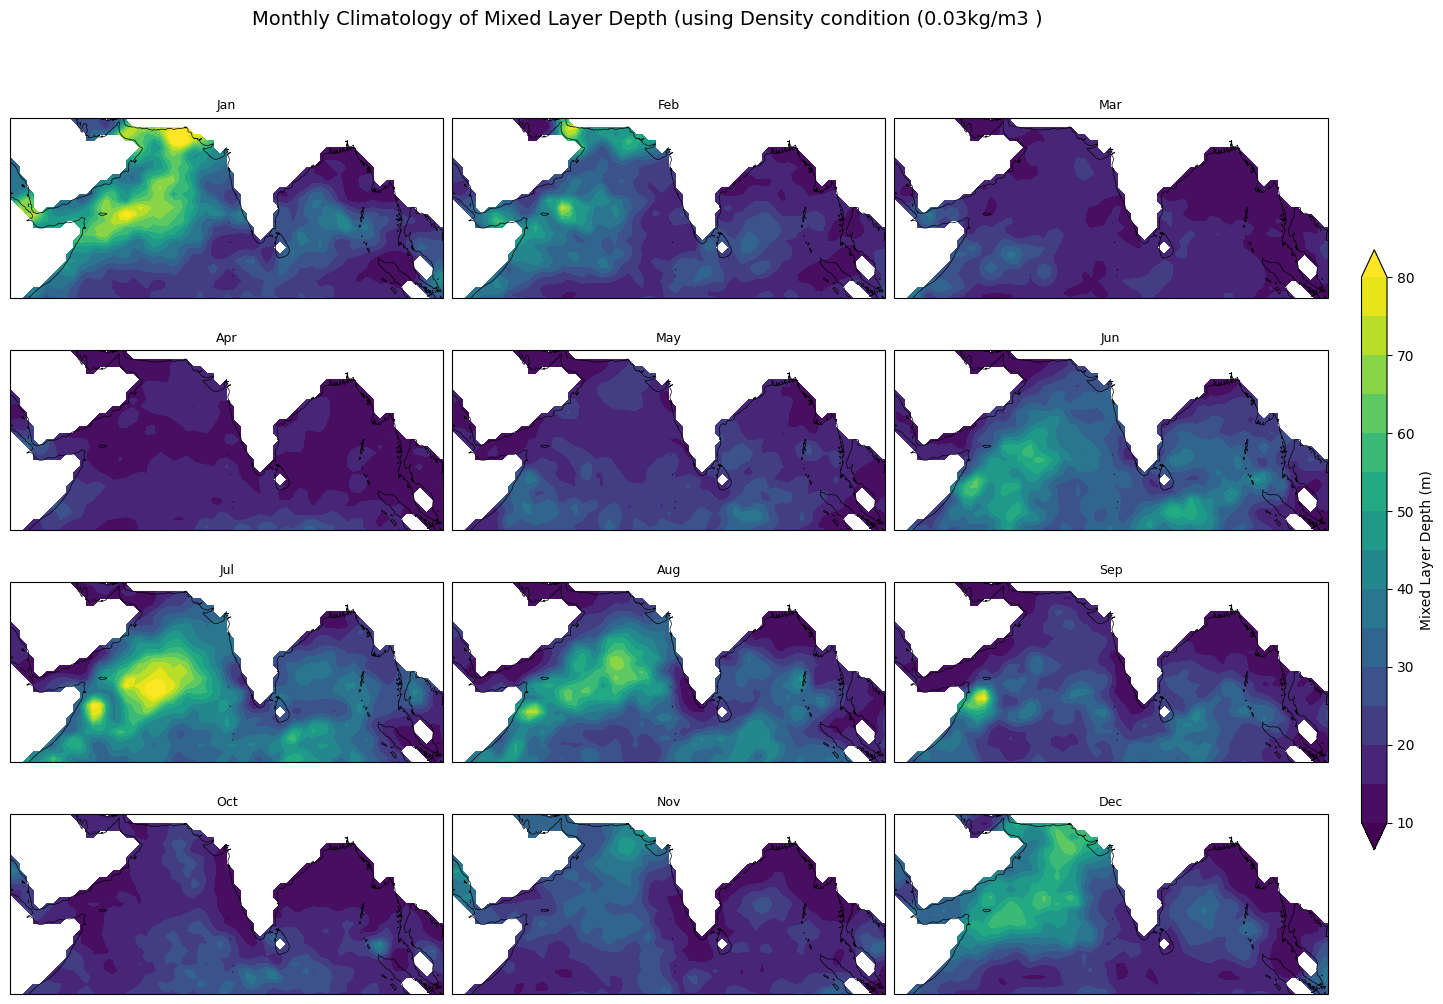

In [23]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np

# Open NetCDF file
ds = xr.open_dataset("/home/rohit/Documents/INCOIS_doc/ITCOO_class/ocean_dynamics2025/Heatbudget/103667/mld_dr003_ref10m_v2023.nc")
mld = ds["mld_dr003"]   # variable
lat = ds["lat"]
lon = ds["lon"]

# Define levels from 10 to 80 m
levels = np.arange(10, 85, 5)

# Create figure with tighter spacing
fig, axes = plt.subplots(
    4, 3, figsize=(17, 12),
    subplot_kw={"projection": ccrs.PlateCarree()},
    gridspec_kw={"wspace": 0.02, "hspace": 0.02}  # reduce space
)

extent = [40, 105, 0, 27]
months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun",
          "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

for i, ax in enumerate(axes.flat):
    cf = ax.contourf(
        lon, lat, mld[i, :, :],
        levels=levels,
        cmap="viridis",
        extend="both",
        transform=ccrs.PlateCarree()
    )
    ax.set_extent(extent, crs=ccrs.PlateCarree())
    ax.add_feature(cfeature.COASTLINE, linewidth=0.5)
    
    # Add titles for each subplot
    ax.set_title(months[i], fontsize=9)
    
    # Show lat labels only for left column
    if i % 3 == 0:
        ax.set_ylabel("Latitude", fontsize=9)
        ax.tick_params(labelleft=True)
    else:
        ax.tick_params(labelleft=False)
    
    # Show lon labels only for bottom row
    if i // 3 == 3:
        ax.set_xlabel("Longitude", fontsize=9)
        ax.tick_params(labelbottom=True)
    else:
        ax.tick_params(labelbottom=False)

# Colorbar
cbar_ax = fig.add_axes([0.92, 0.25, 0.015, 0.5])
fig.colorbar(cf, cax=cbar_ax, label="Mixed Layer Depth (m)")

plt.suptitle("Monthly Climatology of Mixed Layer Depth (using Density condition (0.03kg/m3 )", fontsize=14, y=0.95)
plt.show()


<div style='font-size: 18px;'>
    
# 🌊 Mixed Layer Heat Budget Equation

This equation describes the temperature evolution in the ocean's surface mixed layer (ML), which is crucial for understanding sea surface temperature (SST) variability. It accounts for various physical processes including advection, mixing, entrainment, and surface heat fluxes. (See the Appendix of Moisan and Niiler, 1998 for detailed derivation)

## **Full Mixed Layer Heat Budget Equation**

$$\large
\underbrace{\frac{\partial T_a}{\partial t}}_{\text{Tendency}}   = 
\underbrace{-\left( u_a \frac{\partial T_a}{\partial x} + v_a \frac{\partial T_a}{\partial y} \right)}_{\text{Horizontal advection}} 
+ \underbrace{\kappa_H \left( \frac{\partial^2 T_a}{\partial x^2} + \frac{\partial^2 T_a}{\partial y^2} \right)}_{\text{Horizontal mixing}} 
- \underbrace{\frac{1}{h} \left[ \kappa_z \frac{\partial T}{\partial z} \right]_{-h}}_{\text{Vertical mixing}} 
- \underbrace{
    \left( \frac{T_a - T_{-h}}{h} \right)
    \left(
        \frac{dh}{dt} + w_{-h} + u_{-h} \frac{dh}{dx} + v_{-h} \frac{dh}{dy}
    \right)
}_{\text{Entrainment}} 
+ \underbrace{
    \frac{q_o - q_{pen}}{\rho_0 c_p h}
}_{\text{Net heat flux}}
$$


## **Explanation of Terms**

### 🔁 Tendency

- **$T_a$**: Mixed layer average temperature  
- **$\frac{\partial T_a}{\partial t}$**: Rate of change of temperature in the mixed layer (tendency term)

### 🔁 Horizontal Advection
- Represents the transport of heat by horizontal currents.
- **$u_a, v_a$**: Horizontal velocity components
- **$\frac{\partial T_a}{\partial x}, \frac{\partial T_a}{\partial y}$**: Horizontal temperature gradients

### 🌐 Horizontal Mixing
- Accounts for diffusive mixing due to small-scale turbulence.
- **$\kappa_H$**: Horizontal eddy diffusivity
- **$\frac{\partial^2 T_a}{\partial x^2}, \frac{\partial^2 T_a}{\partial y^2}$**: Second derivatives of temperature

### ⬇️ Vertical Mixing
- Represents mixing at the base of the mixed layer.
- **$\kappa_Z$**: Vertical eddy diffusivity
- **$\rho_0 c_p \kappa_Z (\frac{\partial T}{\partial z})_{z=-h}$**: Vertical temperature gradient at the base of the ML
- Suffix **$ _{-h} $** : quantity at the base of the ML

### 🔄 Entrainment
- Describes the incorporation of water from below the mixed layer due to changes in mixed layer depth.
- **$T_{-h}$**: Temperature at the base of the ML
- **$\frac{dh}{dt}$**: Rate of change of mixed layer depth
- **$w_{-h}$**: Vertical velocity at the base
- **$u_{-h}, v_{-h}$**: Horizontal velocities at the base
- **$\frac{dh}{dx}, \frac{dh}{dy}$**: Horizontal gradients of MLD
- **$\left( \frac{T_a - T_{-h}}{h} \right) \left( \frac{dh}{dt} + w_{-h} + u_{-h} \frac{dh}{dx} + v_{-h} \frac{dh}{dy} \right)$**: Entrainment term

### ☀️ Net Heat Flux
- Includes surface heat input and loss due to penetrating shortwave radiation.
- **$q_o$**: Net surface heat flux
- **$q_{pen}$**: Penetrative shortwave radiation loss
- **$\rho_0$**: Seawater density
- **$c_p$**: Specific heat capacity of seawater
- **$h$**: Mixed layer depth
- **$\frac{q_o - q_{pen}}{\rho_0 c_p h}$**: Net heat flux term

---

This equation provides a comprehensive framework for analyzing SST variability and is essential for understanding ocean-atmosphere interactions, especially in tropical regions.

### Download the Mixed layer Simulator : https://github.com/Rohithocean/physical_oceanography/blob/main/mixed_layer_heat_budget_simulator.py
#### Step to install and run  
(copy the below command in the terminal)
- pip install streamlit
- streamlit run mixed_layer_heat_budget_simulator.py



<div style='font-size: 18px;'>
    
### The vertical average of temperature and the horizontal components of velocity ove the ML.
$$
T_a = \frac{1}{h} \int_{-h}^{0} T \, dz, \quad 
u_a = \frac{1}{h} \int_{-h}^{0} u \, dz, \quad 
v_a = \frac{1}{h} \int_{-h}^{0} v \, dz
$$

### Vertical turbulent mixing term, averaged in the ML
- Parameterization based on the second derivative of temperature for the vertical and horizontal turbulent mixing.

  $$
\frac{1}{h} \int_{-h}^{0} \frac{\partial}{\partial z} \left( \kappa_z \frac{\partial T}{\partial z} \right) dz 
= -\frac{1}{h} \left[ \kappa_z \frac{\partial T}{\partial z} \right]_{-h}
$$

### Horizontal turbulent mixing term, averaged in the ML

$$
\frac{\kappa_H}{h} \int_{-h}^{0} \left( \frac{\partial^2 T}{\partial x^2} + \frac{\partial^2 T}{\partial y^2} \right) dz
$$

Applying the Leibniz rule:

$$
\int_{-h}^{0} \frac{\partial^2 T}{\partial x^2} dz = 
h \frac{\partial^2 T_a}{\partial x^2} + 
(T_a - T_{-h}) \frac{\partial^2 h}{\partial x^2} + 
2 \frac{\partial}{\partial x}(T_a - T_{-h}) \frac{\partial h}{\partial x}
$$


$$
\int_{-h}^{0} \frac{\partial^2 T}{\partial x^2} dz \approx h \frac{\partial^2 T_a}{\partial x^2}
$$

$$
\int_{-h}^{0} \frac{\partial^2 T}{\partial y^2} dz \approx h \frac{\partial^2 T_a}{\partial y^2}
$$


$$
\frac{\kappa_H}{h} \int_{-h}^{0} \left( \frac{\partial^2 T}{\partial x^2} + \frac{\partial^2 T}{\partial y^2} \right) dz 
= \kappa_H \left( \frac{\partial^2 T_a}{\partial x^2} + \frac{\partial^2 T_a}{\partial y^2} \right)
$$


### Entrainment 

$$
\left( \frac{T_a - T_{-h}}{h} \right) 
\left[ 
\underbrace{\frac{\partial h}{\partial t}}_{\text{ML tendency}} + 
\underbrace{u_{-h} \frac{\partial h}{\partial x} + v_{-h} \frac{\partial h}{\partial y}}_{\text{Lateral induction}} + 
\underbrace{w_{-h}}_{\text{Vertical advection}}
\right]
$$
